## STAT SIGN 1

    1. 
    A. Consider the p-value distribution obtained from a generated dataset of 1000 features (1000pvs.csv). How many features pass the 0.05 significance theshold before correction for multiple testing? After multiple testing correction by bonferroni procedure? After multiple testing correction by Benjamini-Hochbegr procedure? Use 0.05 significance thershold for all cases.

    B. Same question for p-value distribution of 20 features (20pvs.csv)

    C. Because these p-values were produced from a t-test on simulated normally distributed data, I can tell you that the features 0-499 in the "1000pvs.csv" dataset had no difference between the two sample groups (H0 hypothesis true), and features 500-999 did indeed have a difference between the two sample groups (H0 hypothesis false). Similarly for "20pvs.csv", first 10 features had no effect and second 10 features did indeed have a difference between sample groups. 

    Consider the significant features ("discoveries") you got in A and B after Bonferroni correction. Calculate the number of false discoveries, number of true discoveries, and the FDR. Consider the significant features you got in A and B after Benjamini-Hochberg correction and calculate the number of false discoveries, number of true discoveries, and the FDR, as well. For both Bonferroni and Benjamini-Hochberg procedures, how do these calculated values relate to the imposed 0.05 theshold level?
    
    2.
    Consider simulated data presented below. Assume the data represents a table of M features and 2*K samples, where the first K samples belong to some sample group A and the second K samples belong to some group B. Of course, there is actually no difference between group A and group B, since they are generated by the same distribution (for all features).

    A. Perform a t-test for each feature to compare the mean of sample group A and sample group B. How many features are significant at the 0.05 significant level? Perform a Benjamini-Hochberg correction for multiple testing. How many features are significant after correcting for multiple testing? 

    B. Simulate this dataset 100 times and assess the  number of features signifacant at 0.05 level before and after correction. Consider both the average values and the distribution.
    
    3. 
    Consider the "ubiquitin.csv" dataset (see below), which contains information on the ubiquitin protein levels in different layers of a particular coritcal brain region. The question you should answer is: for this brain region, is there a significant difference in the average levels of this protein between schizophrenia (SZ) and control? Perform a permutation test that takes into account the dependency in the data to answer the question.
    
    4. 
    Consider the dataset "different_variance.csv", which contains two generated samples from some group A and B. Test the hypothesis that the two samples from group A and B have the same standard deviation. Use a permtutation test for this purpose and report the permutation p-value.

    (You do not need this information to perform the task, however, the data was generated as follows: data points from group A were generated by a normal distribution with mean 10 and standard deviation 1, and data points from group B were generated by a normal distribution with mean 10 and standard deviation 2)
    
    5. 
    A. Consider the dataset "X200features.csv". It contains simulated data, representing 2*20 samples and 200 features, where the first 20 samples belong to some sample group A and the second 20 samples belong to some group B. Perform, for each feature, a t-test to compare the mean of group A and group B. How many features are significant at the 0.05 significant level without correction for multiple testing ("nominal significance")? Using permutation test, can you assess whether this value is higher than expected by chance (i.e. when there is no difference between sample groups A and B for any feature)? Using permutation procedure, estimate the number of false positive features among them, and estimate the FDR value.

    B. Next, perform a Benjamini-Hochberg correction with FDR threshold equal to the estimate you got in A. How many significant features do you get after the correction and how does this number compare to the number features at "nominal significance" level 0.05?

    C. With the help of the Benjamini-Hochberg correction, can you define at what "nominal level of significance" you would obtain a set of significant features for which your permutation procedure would give you approximately 5% FDR level estimate?


    (You do not need this information to perform the task, however, the data was generated as follows. For 20 features, data points from group A were generated by a normal distribution with mean 10 and standard deviation 1, and data points from group B were generated by a normal distribution with mean 11 and standard deviation 1. For the rest of the 180 features, the data was generated as identical normally distributed data for both group A and B)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns



from numpy.random import uniform
from numpy.random import normal
from numpy.random import exponential
from numpy.random import lognormal

from numpy.random import choice
from numpy.random import permutation


from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

from statsmodels.sandbox.stats.multicomp import multipletests
from sklearn.cluster import KMeans
import seaborn as sns


%matplotlib inline

## question 1

In [ ]:
#path='https://raw.githubusercontent.com/Annatkachev/StatLAB/refs/heads/main/StatSign_1/'
pv=pd.read_csv('1000pvs.csv',index_col=0)['0']

In [ ]:
pv=pd.read_csv('20pvs.csv',index_col=0)['0']

## question 2

In [2]:
#sample size
K=20
#number of features
M=200

X=normal(10,1,(2*K,M))
X=pd.DataFrame(X)

X.index=['A'+str(i) for i in np.arange(1,K+1)]+['B'+str(i) for i in np.arange(1,K+1)]
X.columns=['feature'+str(i) for i in np.arange(1,len(X.columns)+1)]

Text(33.0, 0.5, 'samples')

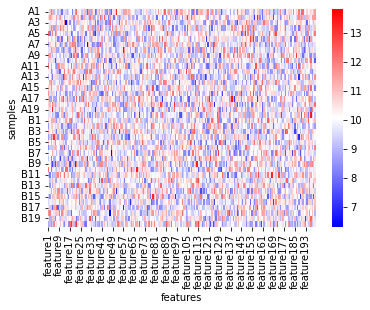

In [3]:
sns.heatmap(X,cmap='bwr')
plt.xlabel('features')
plt.ylabel('samples')

In [4]:
#group A and B comparison
ind=X.index
inda=ind[:K]
indb=ind[K:]
pv=ttest_ind(X.loc[inda],X.loc[indb],axis=0,equal_var=False)[1]

## question 3

In [ ]:
#path='https://raw.githubusercontent.com/Annatkachev/StatLAB/refs/heads/main/StatTest_3/'
df=pd.read_csv(path+'ubiquitin.csv',index_col=0)

## question 4

In [ ]:
#path='https://raw.githubusercontent.com/Annatkachev/StatLAB/refs/heads/main/StatSign_1/'
X=pd.read_csv('different_variance.csv',index_col=0)

## question 5

In [ ]:
path='/home/anna/PROJECTS2025/StatDatAnLAB/StatSign/'
X=pd.read_csv(path+'X200features.csv',index_col=0)

In [ ]:
sns.heatmap(X,cmap='bwr')
plt.xlabel('features')
plt.ylabel('samples')